# Bài tập 1 : Thống kê máy tính và ứng dụng

# Khai báo các thư viện cần thiết 

In [1]:
import numpy as np
import math
import statistics
import matplotlib.pyplot as plt

## Câu 1a :
### Bước 1: Xác định điều kiện thắng trò chơi

- Mỗi ván thắng được **2 điểm**, nên để đạt 10 điểm, An cần thắng **5 ván** trước Bình.
- Xác suất An thắng mỗi ván là $ p = 0.6 $, xác suất Bình thắng mỗi ván là $ q = 1 - p = 0.4 $.
- Trò chơi kết thúc tại ván $ n $ khi An thắng **ván thứ 5** của mình.

Giá trị nhỏ nhất của \( n \) là 5 (nếu An thắng liên tiếp 5 ván).  
Nếu $ n \geq 10 $, Bình đã thắng tối thiểu 5 ván, đồng nghĩa với việc An không thể thắng.  
Vậy $ n $ chỉ có thể nhận giá trị: $ 5, 6, 7, 8, 9 $.

---

### Bước 2: Xác suất An thắng ở ván thứ $n$

Để An thắng trò chơi ở ván thứ $n$:

1. **An thắng ván thứ $n$** với xác suất $p$.
2. **Trong $n-1$ ván đầu, An thắng đúng 4 ván** và Bình thắng $n - 5$ ván:
   - Số cách chọn ra 4 ván thắng của An trong $n - 1$ ván:  
     $$
     \binom{n-1}{4}
     $$
   - Xác suất An thắng 4 ván là $p^4$, Bình thắng $n-5$ ván là $q^{n-5}$.

Vậy xác suất để An thắng **chính xác tại ván thứ $n$** là:

$$
P(\text{An thắng ở ván } n) = \binom{n-1}{4} \cdot p^4 \cdot q^{n-5} \cdot p
$$

Hay rút gọn:

$$
P(n) = \binom{n-1}{4} \cdot (0.6)^5 \cdot (0.4)^{n-5}
$$

---

### Bước 3: Tổng hợp xác suất

Xác suất tổng để An thắng trò chơi là tổng các xác suất từ $n = 5$ đến $n = 9$:

$$
P_{\text{An thắng}} = \sum_{n=5}^{9} \binom{n-1}{4} \cdot (0.6)^5 \cdot (0.4)^{n-5}
$$



In [19]:
P = 0
p, q = 0.6, 0.4

for i in range (5, 10) :
    P += math.comb(i - 1, 4) * 0.6**5 * 0.4**(i - 5)
print("Xác suất An thắng trò chơi: {:.4f}".format(P))

Xác suất An thắng trò chơi: 0.7334


### Sử dụng mô phỏng 

In [20]:
N = 100000 # số lần thử
count = 0 # đếm số lần An win 
rounds = []
for i in range (N) :
    count_to_win = 0 
    count_to_lose = 0
    count_to_round = 0
    while True : 
        rand = np.random.binomial(1, 0.6)
        count_to_round += 1
        if rand : 
            count_to_win += 1
        else :
            count_to_lose += 1
        if count_to_win == 5 :
            count += 1
            rounds.append(count_to_round)
            break
        if count_to_lose == 5 :
            break
count / N, statistics.mean(rounds)

(0.73267, 7.195858981533296)

## Câu 1b :
### Bước 1: Xác định điều kiện thắng trò chơi

- Người chơi đạt **10 điểm** đầu tiên sẽ thắng trò chơi.
- Quy tắc tính điểm của mỗi ván như sau:
  - Ván đầu tiên (hoặc khi người chơi không thắng liên tiếp) người thắng được **2 điểm**.
  - Nếu người thắng ván hiện tại cũng thắng ván ngay trước đó thì nhận được **3 điểm**.
- Ban đầu, chưa có ván nào thắng nên ván đầu tiên người thắng sẽ được 2 điểm.

---

### Bước 2: Xác định trạng thái và thiết lập công thức truy hồi

Để giải bài toán, ta đặt:
- $P(a, b, L)$ là xác suất để An thắng trò chơi khi hiện tại An có $a$ điểm, Bình có $b$ điểm, và kết quả của ván gần nhất được ký hiệu bởi $L$ với:
  - $L = A$ nếu ván gần nhất An thắng,
  - $L = B$ nếu ván gần nhất Bình thắng,
  - $L = N$ nếu chưa có ván nào (trạng thái ban đầu).

**Điều kiện dừng:**
- Nếu $a \ge 10$: An đã thắng, nên $P(a, b, L) = 1$.
- Nếu $b \ge 10$: Bình đã thắng, nên $P(a, b, L) = 0$.

**Chuyển tiếp từ trạng thái $(a,b,L)$:**

Khi chơi ván mới:
1. **Nếu An thắng ván mới:**
   - Xác suất thắng là $p = 0.6$.
   - Điểm nhận được:  
     $$
     \delta_A(L) = 
     \begin{cases}
     3, & \text{nếu } L = A, \\
     2, & \text{nếu } L = B \text{ hoặc } L = N.
     \end{cases}
     $$
   - Trạng thái chuyển sang: $(a + \delta_A(L), \; b, \; A)$.

2. **Nếu Bình thắng ván mới:**
   - Xác suất thắng là $q = 0.4$.
   - Điểm nhận được:  
     $$
     \delta_B(L) = 
     \begin{cases}
     3, & \text{nếu } L = B, \\
     2, & \text{nếu } L = A \text{ hoặc } L = N.
     \end{cases}
     $$
   - Trạng thái chuyển sang: $(a, \; b + \delta_B(L), \; B)$.

Từ đó, công thức truy hồi của bài toán là:
$$
P(a, b, L) = 0.6 \cdot P\Big(a + \delta_A(L),\; b,\; A\Big) + 0.4 \cdot P\Big(a,\; b + \delta_B(L),\; B\Big),
$$
với $a < 10$ và $b < 10$.

---

### Bước 3: Xác định xác suất thắng ban đầu

Mục tiêu của bài toán là tính xác suất để An thắng trò chơi bắt đầu từ trạng thái ban đầu, tức:
$$
P_{\text{An thắng}} = P(0, 0, N).
$$

**Kết luận:**

Công thức truy hồi tổng quát là:
$$
\boxed{
P(a,b,L) = 
\begin{cases}
1, & \text{nếu } a \ge 10, \\
0, & \text{nếu } b \ge 10, \\
0.6 \cdot P\Big(a + \delta_A(L),\; b,\; A\Big) + 0.4 \cdot P\Big(a,\; b + \delta_B(L),\; B\Big), & \text{nếu } a < 10 \text{ và } b < 10,
\end{cases}
}
$$
với
$$
\delta_A(L) = 
\begin{cases}
3, & \text{nếu } L = A, \\
2, & \text{nếu } L = B \text{ hoặc } L = N,
\end{cases}
\quad
\delta_B(L) = 
\begin{cases}
3, & \text{nếu } L = B, \\
2, & \text{nếu } L = A \text{ hoặc } L = N.
\end{cases}
$$

Xác suất mà An thắng trò chơi cần tính là:
$$
P_{\text{An thắng}} = P(0, 0, N).
$$

Giải bài toán này đòi hỏi áp dụng phương pháp quy hoạch động (dynamic programming) hoặc giải đệ quy dựa trên công thức trên.


In [21]:
def dp(a, b, last, memo={}):
    """
    Hàm dp(a, b, last) trả về xác suất An thắng trò chơi khi
    - a: số điểm hiện tại của An
    - b: số điểm hiện tại của Bình
    - last: kết quả của ván gần nhất ('N' nếu chưa có ván nào, 'A' nếu An thắng ván cuối, 'B' nếu Bình thắng ván cuối)
    """
    # Điều kiện dừng:
    if a >= 10:
        return 1.0  # An thắng
    if b >= 10:
        return 0.0  # Bình thắng

    # Dùng memoization để tránh tính lại
    key = (a, b, last)
    if key in memo:
        return memo[key]

    # Xác suất thắng mỗi ván:
    p = 0.6  # Xác suất An thắng ván hiện tại
    q = 0.4  # Xác suất Bình thắng ván hiện tại

    # Xác định điểm nhận được nếu thắng ván mới
    if last == "A":
        delta_A = 3
    else:
        # Nếu last là 'B' hoặc 'N'
        delta_A = 2

    if last == "B":
        delta_B = 3
    else:
        # Nếu last là 'A' hoặc 'N'
        delta_B = 2

    # Công thức truy hồi:
    # Nếu An thắng ván mới: điểm An tăng lên delta_A, last trở thành 'A'
    # Nếu Bình thắng ván mới: điểm Bình tăng lên delta_B, last trở thành 'B'
    res = p * dp(a + delta_A, b, "A", memo) + q * dp(a, b + delta_B, "B", memo)

    memo[key] = res
    return res


# Tính xác suất An thắng trò chơi bắt đầu từ trạng thái ban đầu: (0, 0, 'N')
P_An_thang = dp(0, 0, "N")
print("Xác suất An thắng trò chơi: {:.4f}".format(P_An_thang))

Xác suất An thắng trò chơi: 0.7188


## Sử dụng mô phỏng

In [22]:
N = 100000
count = 0
rounds.clear()
for i in range (N) :
    flagA = False
    flagB = False
    pointA = 0
    pointB = 0
    count_to_round = 0
    while True :
        rand = np.random.binomial(1, 0.6) 
        count_to_round += 1
        if rand and flagA :
            pointA += 3
            flagB = False
        elif rand and flagA == False :
            pointA += 2
            flagA = True
            flagB = False
        elif not rand and flagB :
            pointB += 3
            flagA = False
        elif not rand and flagB == False :
            pointB += 2
            flagB = True
            flagA = False
        
        if pointA >= 10 :
            count += 1
            rounds.append(count_to_round)
            break
        if pointB >= 10 :
            break

count / N, statistics.mean(rounds)

(0.72008, 5.911537606932563)

## Phần 1c: Tính trung bình số ván cần chơi để An thắng

Chúng ta cần tính số ván trung bình cần chơi (điều kiện trò chơi kết thúc với chiến thắng của An) cho mỗi trường hợp.

---

### Trường hợp (a): Mỗi ván thắng được 2 điểm (tức An cần thắng 5 ván)

Trong trường hợp này, trò chơi kết thúc khi An thắng đủ 5 ván và số ván chơi $n$ chỉ nhận giá trị từ 5 đến 9.  
Giả sử:
- $p = 0.6$ là xác suất An thắng 1 ván.
- $q = 0.4$ là xác suất Bình thắng 1 ván.

**Công thức:**

Xác suất An thắng tại ván thứ $n$ là:
$$
P(n \cap A) = \binom{n-1}{4} \cdot p^5 \cdot q^{\,n-5}, \quad n=5,6,7,8,9.
$$

Tổng xác suất để An thắng là:
$$
P(A) = \sum_{n=5}^{9} \binom{n-1}{4} \cdot p^5 \cdot q^{\,n-5}.
$$

Số ván trung bình (điều kiện An thắng) là:
$$
E(n | A) = \frac{\sum_{n=5}^{9} n \cdot P(n \cap A)}{P(A)} = \frac{\sum_{n=5}^{9} n \cdot \binom{n-1}{4} \cdot p^5 \cdot q^{\,n-5}}{P(A)}.
$$


In [23]:
p = 0.6
q = 0.4

# Tính P_win và tổng các n*P(n)
P_win = 0.0
sum_nP = 0.0

for n in range(5, 10):  # n = 5,6,7,8,9
    comb = math.comb(n - 1, 4)  # số cách chọn 4 ván thắng trong n-1 ván
    Pn = comb * (p**5) * (q ** (n - 5))
    P_win += Pn
    sum_nP += n * Pn

if P_win > 0:
    E_n = sum_nP / P_win
    print("Trường hợp (a):")
    print("P(An thắng) = {:.4f}".format(P_win))
    print("Số ván trung bình cần chơi (điều kiện An thắng) = {:.4f}".format(E_n))
else:
    print("Không có trường hợp An thắng.")

Trường hợp (a):
P(An thắng) = 0.7334
Số ván trung bình cần chơi (điều kiện An thắng) = 7.1934


## Câu 1c - Trường hợp (b):
Tương tự như trên ta có :
$$ E(n | A) = \sum_n n \times P(n | A) = \frac{\sum_n n \times P(n \cap A)}{P(A)}$$ 
Ta gọi $dp(state, p_{current}, current, rounds)$ để tính $n \times P(n \cap A)$ sau khi gặp điều kiện dừng ta sẽ lưu vào rounds để tí tính tổng.  

In [24]:
def dp(state, p_current, current, rounds):
    
    a, b, last = state
    p = 0.6
    q = 0.4
    # Điều kiện kết thúc:
    if a >= 10:
        rounds.append(p_current * current)
        return 
    if b >= 10:
        rounds.append(0)
        return 
    

    # Xác định số điểm nhận được nếu thắng ván mới:
    delta_A = 3 if last == "A" else 2
    delta_B = 3 if last == "B" else 2

    # Xác định các trạng thái chuyển tiếp:
    state_A = (a + delta_A, b, "A")
    state_B = (a, b + delta_B, "B")

    dp(state_A, p * p_current, current + 1, rounds)
    dp(state_B, q * p_current, current + 1, rounds)



# Tính từ trạng thái ban đầu (0, 0, 'N')
rounds = []
dp((0, 0, "N"), 1, 0, rounds)
E_rounds = sum(rounds) / P_An_thang
print("Trường hợp (b):")
print("P(An thắng) = {:.4f}".format(P_An_thang))
print("Số ván trung bình cần chơi (điều kiện An thắng) = {:.4f}".format(E_rounds))

Trường hợp (b):
P(An thắng) = 0.7188
Số ván trung bình cần chơi (điều kiện An thắng) = 5.9143


## Câu 2a:
Ta có $U \sim \text{Uniform} (0, 1) $ nên ta có hàm mật độ xác suất :
$$
    f_U(u) = 
    \begin{cases}
    1, & 0 \leq u \leq 1 \\
    0, & \text{otherwise} 
    \end{cases}
$$
Đặt biến mới :
$$
X = a + (b-a) U, \space a \le X \le b
$$
với các số thực $a < b$. Ta cần tìm phân phối của $X$.

### 1. Tìm hàm phân phối của $X$

Với bất kỳ giá trị $x \in \mathbb{R}$, ta có:
$$
F_X(x) = P(X \le x) 
$$
Xét $x < a, (X \le x) = \text{\O}$  
$$\Rarr P(\text{\O}) = 0$$
Xét $a \le x \le b, (X \le x) = \left( a + (b-a) U \le x \right)$
$$\Rarr P\left( a + (b-a) U \le x \right) = P \left(U \le \frac{x - a}{b - a}\right)$$
$$= \int_{-\infty}^{\frac{x - a}{b - a}}du = \int_{0}^{\frac{x - a}{b - a}}du = \frac{x - a}{b - a}$$
Xét $b < x, (X \le x) = \Omega$
$$P(\Omega) = 1$$
Vậy ta có hàm phân phối xác suất của $X$ :
$$
F_X(x) =
\begin{cases}
0, & x < a, \\
\frac{x-a}{b-a}, & a \le x \le b, \\
1, & x > b.
\end{cases}
$$

### 2. Tìm hàm mật độ của $X$

Lấy đạo hàm của $F_X(x)$ theo $x$, ta có:
$$
f_X(x) = \frac{d}{dx} F_X(x) =
\begin{cases}
\frac{1}{b-a}, & a \le x \le b, \\
0, & \text{otherwise}.
\end{cases}
$$

### Kết luận

Biến $X = a + (b-a)U$ có phân phối đều trên khoảng $(a, b)$, tức là
$$
X \sim \text{Uniform}(a, b).
$$


Trung bình của X: 3.4977629004728854


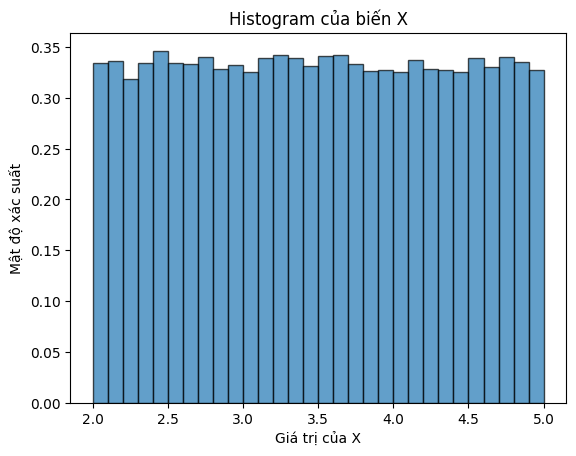

In [4]:
def create_X(N, a, b):
    # Sinh N mẫu từ phân phối đều trên khoảng [0,1]
    U = np.random.uniform(low=0, high=1, size=N)
    # Tính X = a + (b-a)*U
    X = a + (b - a) * U
    return X


N = 100000
a, b = 2, 5
X = create_X(N, a, b)

# Tính trung bình của X
mean_X = np.mean(X)
print("Trung bình của X:", mean_X)
# ~3.5
# Vẽ histogram của X
plt.hist(X, density=True, bins=30, edgecolor="black", alpha=0.7)
plt.title("Histogram của biến X")
plt.xlabel("Giá trị của X")
plt.ylabel("Mật độ xác suất")
plt.show()

## Câu 2b:
Cho $U \sim \text{Uniform}(0,1)$ với hàm mật độ 
$$
f_U(u) = 1, \quad 0 < u < 1.
$$

Chúng ta cần tìm phân phối của $U$ biết rằng $a < U < b$, với $0 < a < b < 1$.

### Bước 1: Tính xác suất của sự kiện $\{a < U < b\}$

$$
P(a < U < b) = \int_a^b 1 \, du = b - a.
$$

### Bước 2: Tính hàm mật độ của $U$ điều kiện $\{a < U < b\}$

Sử dụng công thức hàm mật độ điều kiện:

$$
f_{U|a < U < b}(u) = \frac{f_U(u)}{P(a < U < b)} = \frac{1}{b - a}, \quad \text{với } u \in (a, b).
$$

### Kết luận

Do hàm mật độ của $U$ điều kiện $\{a < U < b\}$ là hằng số trên khoảng $(a, b)$, ta có

$$
U \mid (a < U < b) \sim \text{Uniform}(a, b).
$$


Số lượng mẫu ban đầu: 100000
Số lượng mẫu sau khi lọc (a < U < b): 39993
Tỉ lệ mẫu được chọn: 39.99%
Trung bình của U điều kiện: 0.49924340962614117


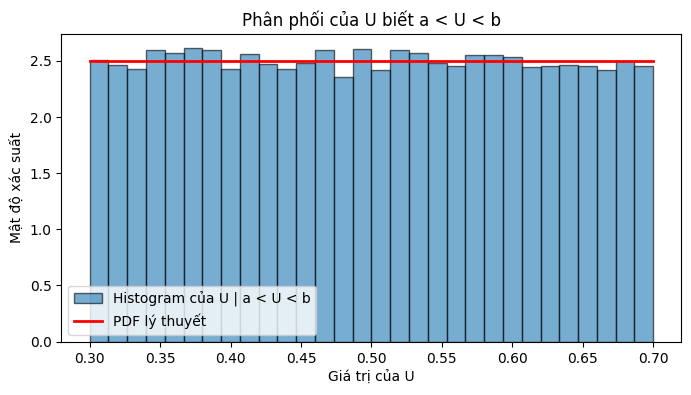

In [7]:
def conditional_U(N, a, b):
    """
    Sinh N mẫu từ phân phối đều trên (0,1) và lọc các mẫu thỏa mãn a < U < b.
    """
    U = np.random.uniform(0, 1, size=N)
    # Lọc các giá trị U sao cho a < U < b
    U_cond = U[(U > a) & (U < b)]
    return U_cond


# Thiết lập số mẫu và các giá trị a, b
N = 100000
a = 0.3
b = 0.7

# Lấy mẫu của U điều kiện a < U < b
U_cond = conditional_U(N, a, b)

# In số lượng mẫu sau khi lọc và tỉ lệ mẫu được chọn
print("Số lượng mẫu ban đầu:", N)
print("Số lượng mẫu sau khi lọc (a < U < b):", len(U_cond))
print("Tỉ lệ mẫu được chọn: {:.2f}%".format(100 * len(U_cond) / N))
print("Trung bình của U điều kiện:", np.mean(U_cond))

# Vẽ histogram của các mẫu U sau khi điều kiện
plt.figure(figsize=(8, 4))
plt.hist(
    U_cond,
    bins=30,
    density=True,
    alpha=0.6,
    edgecolor="black",
    label="Histogram của U | a < U < b",
)

# Vẽ đường PDF lý thuyết của phân phối đều trên (a, b): f(u) = 1/(b-a)
x_values = np.linspace(a, b, 100)
pdf_theo = np.ones_like(x_values) / (b - a)
plt.plot(x_values, pdf_theo, "r-", lw=2, label="PDF lý thuyết")

# Thêm tiêu đề, nhãn trục và chú thích
plt.title("Phân phối của U biết a < U < b")
plt.xlabel("Giá trị của U")
plt.ylabel("Mật độ xác suất")
plt.legend()

plt.show()

## Câu 2c:
Cho $U$ và $V$ là các biến ngẫu nhiên độc lập có phân phối đều trên $(0,1)$, ta định nghĩa biến mới
$$
W = \max\{U, V\}.
$$

### Bước 1: Tìm hàm phân phối của $W$

Với bất kỳ giá trị $w \in [0,1]$, ta có:
$$
F_W(w) = P(W \le w) = P(\max\{U, V\} \le w).
$$

Điều này đồng nghĩa với việc cả $U$ và $V$ đều phải không vượt quá $w$, do đó:
$$
F_W(w) = P(U \le w \text{ và } V \le w).
$$

Với tính độc lập của $U$ và $V$:
$$
F_W(w) = P(U \le w) \cdot P(V \le w).
$$

Do $U, V \sim \text{Uniform}(0,1)$ nên:
$$
P(U \le w) = w \quad \text{và} \quad P(V \le w) = w.
$$

Vậy:
$$
F_W(w) = w \cdot w = w^2, \quad \text{với } 0 \le w \le 1.
$$

Ngoài ra, đối với $w < 0$, ta có $F_W(w)=0$ và với $w > 1$, $F_W(w)=1$.

### Bước 2: Tìm hàm mật độ của $W$

Lấy đạo hàm của $F_W(w)$ theo $w$, ta được:
$$
f_W(w) = \frac{d}{dw}F_W(w) = \frac{d}{dw}(w^2) = 2w, \quad \text{với } 0 \le w \le 1.
$$

### Kết luận

Biến $W = \max\{U,V\}$ có hàm phân phối:
$$
F_W(w) =
\begin{cases}
0, & w < 0, \\
w^2, & 0 \le w \le 1, \\
1, & w > 1,
\end{cases}
$$

và hàm mật độ:
$$
f_W(w) =
\begin{cases}
2w, & 0 \le w \le 1, \\
0, & \text{với } w \notin [0,1].
\end{cases}
$$


0.6674083761346942


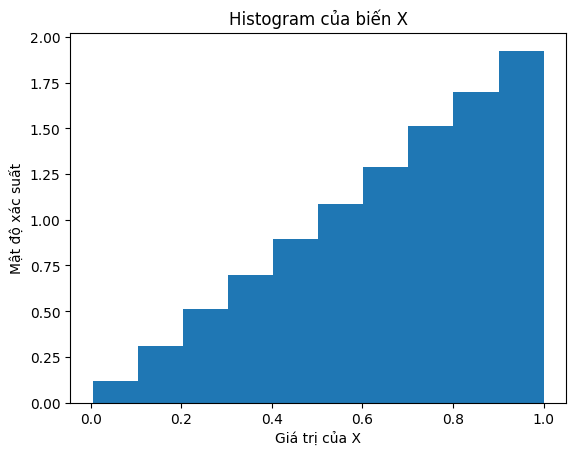

In [10]:
def create_max(N):
    U = np.random.uniform(0, 1, size=N)
    V = np.random.uniform(0, 1, size=N)
    X = np.maximum(U, V)
    return X


N = 100000
X = create_max(N)
print(np.mean(X))
plt.hist(X, density=True)
plt.title("Histogram của biến X")
plt.xlabel("Giá trị của X")
plt.ylabel("Mật độ xác suất")
plt.show()

## Câu 3a:
Cho $A, B$ là 2 điểm được chọn ngẫu nhiên và độc lập theo phân phối đều trên khoảng $[0,1]$.  
Gọi 
$$
D = |A - B|
$$ 
là khoảng cách giữa $A$ và $B$.

### Bước 1: Xác định hàm mật độ của $D$

Biết rằng $A, B \sim \text{Uniform}(0,1)$ độc lập, ta có hiệu 
$$
X = A - B.
$$
Ta có hàm mật độ của $A, B$ :
$$
f_A(a) = \begin{cases}
1, & a \in [0, 1] \\
0, & \text{otherwise}
\end{cases}
$$
$$
f_B(b) = \begin{cases}
1, & b \in [0, 1] \\
0, & \text{otherwise}
\end{cases}
$$
Hàm mật độ của $X$ được biết là
$$
f_X(x) = \int_{-\infty}^{\infty}f_A(a)f_B(a - x)da
$$
$$\Rarr f_X(x) = 1 - |x|, \space x \in [-1, 1]$$
Do đó, với $D = |X|$, hàm mật độ của $D$ được tính như sau:
$$
f_D(d) = f_X(d) + f_X(-d) = (1-d) + (1-d) = 2(1-d), \quad d \in [0,1].
$$

### Bước 2: Tính kỳ vọng của $D$

Kỳ vọng của $D$ được tính bằng:
$$
E(D) = \int_0^1 d \cdot f_D(d) \, dd = \int_0^1 d \cdot 2(1-d) \, dd.
$$
Tính tích phân:
$$
E(D) = 2 \int_0^1 (d - d^2) \, dd = 2\left(\frac{1}{2} - \frac{1}{3}\right) = 2\left(\frac{3-2}{6}\right) = 2\left(\frac{1}{6}\right) = \frac{1}{3}.
$$

### Kết luận:
Kỳ vọng của khoảng cách giữa 2 điểm ngẫu nhiên trên khoảng $[0,1]$ là
$$
E(D) = \frac{1}{3}.
$$


In [25]:
D = []
for i in range (10000) :
    a = np.random.uniform(0, 1)
    b = np.random.uniform(0, 1)
    D.append(abs(a - b))
print(sum(D) / len(D))

0.3323686077532303


## Câu 3b:
Cho $A=(x_1,y_1)$ và $B=(x_2,y_2)$ là 2 điểm được chọn độc lập theo phân phối đều trên đơn vị vuông $[0,1]^2$.  
Khoảng cách giữa $A$ và $B$ được định nghĩa là
$$
D = \sqrt{(x_1-x_2)^2+(y_1-y_2)^2}.
$$

### Bước 1: Viết công thức kỳ vọng của khoảng cách
Kỳ vọng của khoảng cách $D$ được cho bởi
$$
E(D)=\int_0^1\int_0^1\int_0^1\int_0^1 \sqrt{(x_1-x_2)^2+(y_1-y_2)^2}\;dx_1\,dy_1\,dx_2\,dy_2.
$$
Đây là một tích phân bốn chiều khá phức tạp khi giải trực tiếp.

### Bước 2: Kết quả đã biết từ nghiên cứu
Kết quả của bài toán “chọn 2 điểm ngẫu nhiên trong đơn vị vuông và tính khoảng cách trung bình” đã được tính toán trong nhiều nghiên cứu. Kết quả là:
$$
E(D) = \frac{\sqrt{2}+2+5\ln(1+\sqrt{2})}{15}.
$$

### Kết luận:
Kỳ vọng của khoảng cách giữa 2 điểm ngẫu nhiên trên đơn vị vuông là
$$
E(D) = \frac{\sqrt{2}+2+5\ln(1+\sqrt{2})}{15}.
$$


In [26]:
D = []
for i in range (10000) :
    x1 = np.random.uniform(0, 1)
    y1 = np.random.uniform(0, 1)
    x2 = np.random.uniform(0, 1)
    y2 = np.random.uniform(0, 1)
    D.append(np.sqrt(np.abs(x1 - x2)**2 + np.abs(y1 - y2)**2))

print(sum(D) / len(D))

0.5253629291932953


## Câu 3c

k = 1: E(D) ≈ 0.3336, r_k ≈ 0.3336
k = 2: E(D) ≈ 0.5218, r_k ≈ 0.3689
k = 3: E(D) ≈ 0.6619, r_k ≈ 0.3821
k = 4: E(D) ≈ 0.7776, r_k ≈ 0.3888
k = 5: E(D) ≈ 0.8783, r_k ≈ 0.3928
k = 6: E(D) ≈ 0.9690, r_k ≈ 0.3956
k = 7: E(D) ≈ 1.0518, r_k ≈ 0.3975
k = 8: E(D) ≈ 1.1279, r_k ≈ 0.3988
k = 9: E(D) ≈ 1.1995, r_k ≈ 0.3998
k = 10: E(D) ≈ 1.2673, r_k ≈ 0.4007


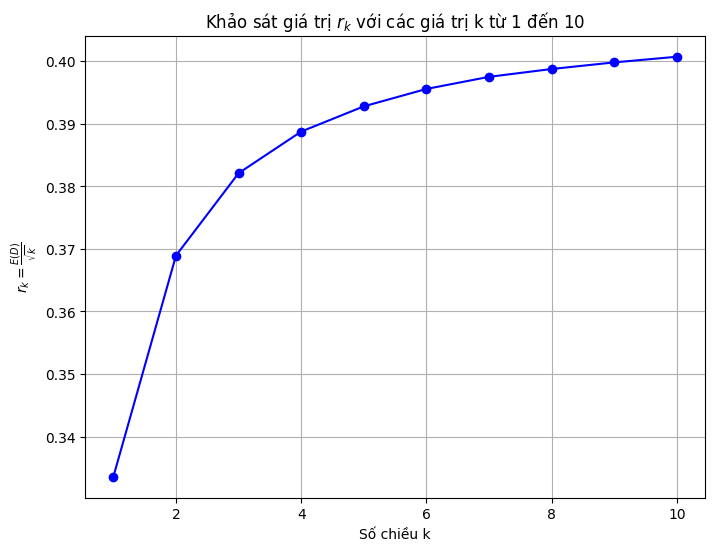

In [27]:
import numpy as np
import matplotlib.pyplot as plt


def compute_expected_distance(k, num_samples=1000000):
    """
    Tính kỳ vọng khoảng cách giữa hai điểm ngẫu nhiên trong [0,1]^k sử dụng Monte Carlo.

    Parameters:
        k (int): số chiều.
        num_samples (int): số mẫu dùng để tính (mặc định 1,000,000).

    Returns:
        float: giá trị ước tính của E(D) cho không gian k chiều.
    """
    # Sinh ngẫu nhiên hai mảng A và B có kích thước (num_samples, k) theo phân phối Uniform(0,1)
    A = np.random.uniform(0, 1, (num_samples, k))
    B = np.random.uniform(0, 1, (num_samples, k))

    # Tính khoảng cách Euclid giữa các cặp điểm
    distances = np.linalg.norm(A - B, axis=1)

    # Trả về trung bình của các khoảng cách
    return distances.mean()


# Danh sách các giá trị k từ 1 đến 20
ks = np.arange(1, 11)
E_D = np.zeros_like(ks, dtype=float)  # Mảng lưu E(D) cho mỗi k
r_k = np.zeros_like(ks, dtype=float)  # Mảng lưu giá trị r_k = E(D)/sqrt(k)

# Tính E(D) và r_k cho từng k
for idx, k in enumerate(ks):
    E_D[idx] = compute_expected_distance(k, num_samples=1000000)
    r_k[idx] = E_D[idx] / np.sqrt(k)
    print(f"k = {k}: E(D) ≈ {E_D[idx]:.4f}, r_k ≈ {r_k[idx]:.4f}")

# Vẽ đồ thị r_k theo k
plt.figure(figsize=(8, 6))
plt.plot(ks, r_k, marker="o", linestyle="-", color="b")
plt.xlabel("Số chiều k")
plt.ylabel(r"$r_k = \frac{E(D)}{\sqrt{k}}$")
plt.title("Khảo sát giá trị $r_k$ với các giá trị k từ 1 đến 10")
plt.grid(True)
plt.show()

## Câu 4a: So sánh hai thuật toán tìm vị trí có giá trị 1 trong mảng

Giả sử mảng $a[1 \dots n]$ chứa đúng $\frac{n}{2}$ số 0 và $\frac{n}{2}$ số 1, với các phần tử được phân bố ngẫu nhiên.

### Thuật toán 1: Duyệt tuần tự

- **Quy trình:**  
  Duyệt mảng từ vị trí đầu tiên đến vị trí cuối cùng, dừng ngay khi gặp giá trị 1.

- **Phân tích kỳ vọng số lần kiểm tra:**  
  Nếu ta giả sử rằng mỗi vị trí có khả năng là 1 với xác suất $p = \frac{1}{2}$ (tương đương với mô hình hình học trong trường hợp các giá trị được coi là độc lập), thì số lần kiểm tra cần thực hiện là một biến ngẫu nhiên có phân phối hình học với tham số $p$.  
  Kỳ vọng của biến hình học là:
  $$
  E(T_1) = \frac{1}{p} = 2.
  $$

- **Đặc điểm:**  
  - Các lần truy cập là tuần tự, giúp tận dụng tối đa bộ nhớ đệm (cache-friendly).  
  - Trong trường hợp xấu nhất (nếu số 1 xuất hiện muộn), số phép so sánh có thể lên đến $n$, nhưng trung bình thì chỉ cần khoảng 2 lần kiểm tra.

---

### Thuật toán 2: Chọn ngẫu nhiên

- **Quy trình:**  
  Chọn ngẫu nhiên một vị trí trong mảng; nếu giá trị tại vị trí đó là 1 thì dừng, nếu không thì lặp lại quá trình cho đến khi gặp 1.

- **Phân tích kỳ vọng số lần kiểm tra:**  
  Vì mảng có $\frac{n}{2}$ số 1 nên xác suất chọn được số 1 ở một lần thử là:
  $$
  p = \frac{\frac{n}{2}}{n} = \frac{1}{2}.
  $$
  Số lần chọn cần thực hiện cũng có phân phối hình học với tham số $p$, do đó:
  $$
  E(T_2) = \frac{1}{p} = 2.
  $$

- **Đặc điểm:**  
  - Các lần truy cập là ngẫu nhiên, điều này có thể dẫn đến việc truy cập không liên tục vào bộ nhớ (cache miss), từ đó làm giảm hiệu năng thực tế.  
  - Mặc dù kỳ vọng số lần kiểm tra là 2, song về lý thuyết không có giới hạn trên cho số lần thử; có thể xảy ra trường hợp “xấu” khi liên tục không chọn được vị trí có giá trị 1 (mặc dù xác suất cho điều này là rất nhỏ).

---

### So sánh chung:

- **Kỳ vọng số lần kiểm tra:**  
  Cả hai thuật toán đều có kỳ vọng là $2$ lần kiểm tra để tìm được một vị trí chứa giá trị 1.

- **Hiệu năng thực tiễn:**  
  - **Thuật toán 1:** Do truy cập tuần tự, hiệu năng cao hơn nhờ tối ưu bộ nhớ đệm, đồng thời tính ổn định và dễ dự đoán.  
  - **Thuật toán 2:** Mặc dù trung bình số lần thử là 2, nhưng việc truy cập ngẫu nhiên có thể gây ra chi phí truy cập bộ nhớ cao hơn và thời gian thực hiện có thể dao động không ổn định hơn.

- **Tính ổn định và đơn giản:**  
  Thuật toán 1 cho kết quả nhanh chóng và ổn định trong hầu hết các trường hợp, trong khi thuật toán 2 có thể mất nhiều lần thử trong trường hợp xấu (mặc dù xác suất xảy ra là rất thấp).

---

### Kết luận:

Mặc dù cả hai thuật toán đều có kỳ vọng số lần kiểm tra là $2$, **thuật toán 1** (duyệt tuần tự) thường được ưu tiên trong thực tế nhờ:
- Tính tuần tự, giúp tối ưu việc sử dụng bộ nhớ (cache-friendly).
- Tính ổn định và đơn giản trong cài đặt.
- Độ đảm bảo trong trường hợp xấu (dù trường hợp xấu nhất của thuật toán 1 có thể là $O(n)$, nhưng trung bình thì hiệu quả cao).

Như vậy, **thuật toán 1 được xem là tốt hơn** so với thuật toán 2.
